In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendation-dataset/anime_recommendation_dataset.csv


In [2]:
# importing dataset 
df = pd.read_csv("/kaggle/input/anime-recommendation-dataset/anime_recommendation_dataset.csv")
df

,title,synopsis,genres,episodes,score,characters
0,Cowboy Bebop,"Enter a world in the distant future, where Bou...","Action, Adventure, Drama, Sci-Fi",26.0,86,"Spike Spiegel, Ein, Faye Valentine, Rhint Celo..."
1,Cowboy Bebop: Tengoku no Tobira,"As the Cowboy Bebop crew travels the stars, th...","Action, Drama, Mystery, Sci-Fi",1.0,82,"Spike Spiegel, Ein, Faye Valentine, Lee Samson..."
2,TRIGUN,Vash the Stampede is a wanted man with a habit...,"Action, Adventure, Comedy, Drama, Sci-Fi",26.0,80,"Kuroneko, Milly Thompson, Vash the Stampede, R..."
3,Witch Hunter ROBIN,Robin Sena is a powerful craft user drafted in...,"Action, Drama, Mystery, Supernatural",26.0,68,"Haruto Sakaki, Akio Kurosawa, Amon, Miho Karas..."
4,Bouken Ou Beet,It is the dark century and the people are suff...,"Adventure, Fantasy, Supernatural",52.0,65,"Kissu, Zenon, Beet, Poala, Beltoze, Milfa, Gru..."
...,...,...,...,...,...,...
195,Kidou Senkan Nadesico,Akito doesn't want to fight. Despite a childho...,"Action, Comedy, Mecha, Romance, Sci-Fi",26.0,73,"Gai Daigouji, Tsukumo Shiratori, Genichirou Ts..."
196,Kidou Senkan Nadesico: The prince of darkness,"Two years have passed since the end of the ""Ma...","Action, Comedy, Drama, Mecha, Sci-Fi",1.0,64,"Genichirou Tsukiomi, Hokushin, Saburouta Takas..."
197,Kuro no Danshou,Based on the erotic game by Abogado Powers & O...,"Hentai, Horror, Mystery",4.0,45,"Satoshi Suzusaki, Asuka Kashiwagi, Mina Shizui..."
198,Mezzo Forte,"Mikura, a member of a mercenary team, is asked...","Action, Comedy, Hentai, Sci-Fi",2.0,64,"Momomi Momoi, Hirooka, Tomohisa Harada, Mikura..."


In [3]:
# check the number of rows and columns
df.shape

(200, 6)

In [4]:
# lets check for null values
df.isna().sum()
df.dropna()

,title,synopsis,genres,episodes,score,characters
0,Cowboy Bebop,"Enter a world in the distant future, where Bou...","Action, Adventure, Drama, Sci-Fi",26.0,86,"Spike Spiegel, Ein, Faye Valentine, Rhint Celo..."
1,Cowboy Bebop: Tengoku no Tobira,"As the Cowboy Bebop crew travels the stars, th...","Action, Drama, Mystery, Sci-Fi",1.0,82,"Spike Spiegel, Ein, Faye Valentine, Lee Samson..."
2,TRIGUN,Vash the Stampede is a wanted man with a habit...,"Action, Adventure, Comedy, Drama, Sci-Fi",26.0,80,"Kuroneko, Milly Thompson, Vash the Stampede, R..."
3,Witch Hunter ROBIN,Robin Sena is a powerful craft user drafted in...,"Action, Drama, Mystery, Supernatural",26.0,68,"Haruto Sakaki, Akio Kurosawa, Amon, Miho Karas..."
4,Bouken Ou Beet,It is the dark century and the people are suff...,"Adventure, Fantasy, Supernatural",52.0,65,"Kissu, Zenon, Beet, Poala, Beltoze, Milfa, Gru..."
...,...,...,...,...,...,...
195,Kidou Senkan Nadesico,Akito doesn't want to fight. Despite a childho...,"Action, Comedy, Mecha, Romance, Sci-Fi",26.0,73,"Gai Daigouji, Tsukumo Shiratori, Genichirou Ts..."
196,Kidou Senkan Nadesico: The prince of darkness,"Two years have passed since the end of the ""Ma...","Action, Comedy, Drama, Mecha, Sci-Fi",1.0,64,"Genichirou Tsukiomi, Hokushin, Saburouta Takas..."
197,Kuro no Danshou,Based on the erotic game by Abogado Powers & O...,"Hentai, Horror, Mystery",4.0,45,"Satoshi Suzusaki, Asuka Kashiwagi, Mina Shizui..."
198,Mezzo Forte,"Mikura, a member of a mercenary team, is asked...","Action, Comedy, Hentai, Sci-Fi",2.0,64,"Momomi Momoi, Hirooka, Tomohisa Harada, Mikura..."


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


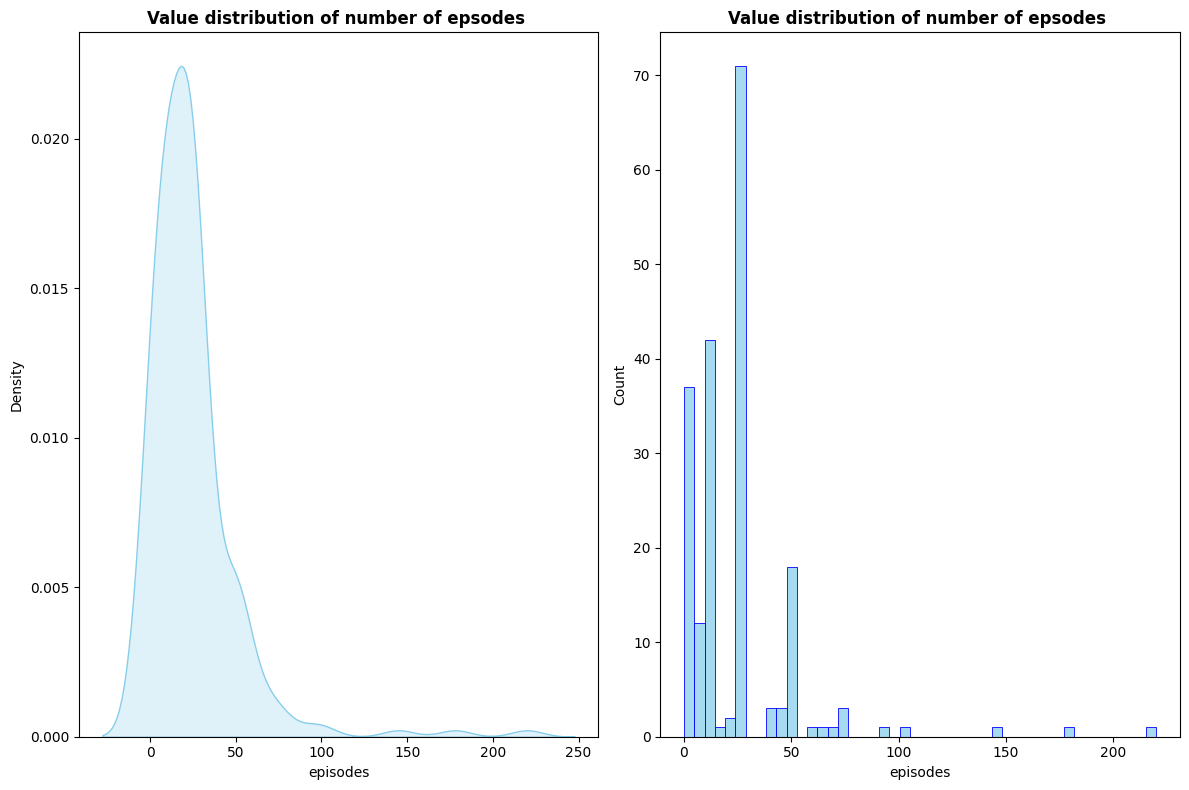

In [5]:
# lets fill the null values of episode with zero
df["episodes"] = df["episodes"].fillna(0)
# lets analysie the distribution values of epsodes
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.kdeplot(x= "episodes",data = df,fill =True,color = "skyblue")
plt.title("Value distribution of number of epsodes ",fontweight = "bold")
plt.subplot(1,2,2)
sns.histplot(x= "episodes",data =df,color= "skyblue",edgecolor = "blue" )
plt.title("Value distribution of number of epsodes ",fontweight = "bold")
plt.tight_layout()

plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


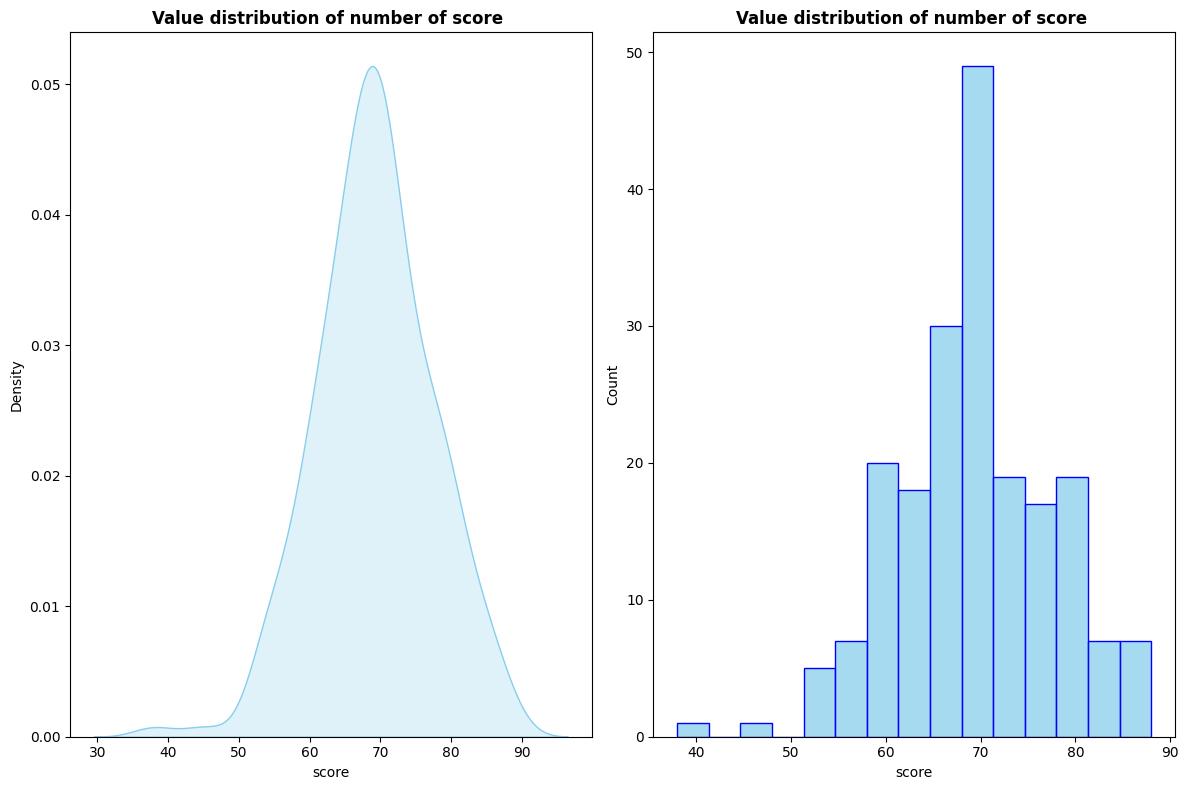

In [6]:
# lets understand the score distribution 
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.kdeplot(x= "score",data = df,fill =True,color = "skyblue")
plt.title("Value distribution of number of score ",fontweight = "bold")
plt.subplot(1,2,2)
sns.histplot(x= "score",data =df,color= "skyblue",edgecolor = "blue" )
plt.title("Value distribution of number of score ",fontweight = "bold")
plt.tight_layout()

plt.show()

In [7]:
# lets undertsand the genre 
from collections import Counter
df["genres"].apply(Counter)

0      {'A': 2, 'c': 2, 't': 2, 'i': 3, 'o': 1, 'n': ...
1      {'A': 1, 'c': 2, 't': 2, 'i': 3, 'o': 1, 'n': ...
2      {'A': 2, 'c': 2, 't': 2, 'i': 3, 'o': 2, 'n': ...
3      {'A': 1, 'c': 1, 't': 3, 'i': 1, 'o': 1, 'n': ...
4      {'A': 1, 'd': 1, 'v': 1, 'e': 3, 'n': 3, 't': ...
                             ...                        
195    {'A': 1, 'c': 4, 't': 1, 'i': 3, 'o': 3, 'n': ...
196    {'A': 1, 'c': 3, 't': 1, 'i': 3, 'o': 2, 'n': ...
197    {'H': 2, 'e': 2, 'n': 1, 't': 2, 'a': 1, 'i': ...
198    {'A': 1, 'c': 2, 't': 2, 'i': 4, 'o': 2, 'n': ...
199    {'A': 2, 'c': 2, 't': 3, 'i': 3, 'o': 2, 'n': ...
Name: genres, Length: 200, dtype: object

Counter({'Drama': 111, 'Comedy': 99, 'Action': 98, 'Romance': 80, 'Sci-Fi': 75, 'Adventure': 69, 'Fantasy': 54, 'Mecha': 43, 'Supernatural': 32, 'Slice of Life': 20, 'Mystery': 19, 'Ecchi': 16, 'Sports': 12, 'Horror': 12, 'Psychological': 12, 'Mahou Shoujo': 8, 'Hentai': 8, 'Music': 3, 'Thriller': 1})
{'Action': 98, 'Adventure': 69, 'Drama': 111, 'Sci-Fi': 75, 'Mystery': 19, 'Comedy': 99, 'Supernatural': 32, 'Fantasy': 54, 'Sports': 12, 'Romance': 80, 'Slice of Life': 20, 'Horror': 12, 'Psychological': 12, 'Thriller': 1, 'Ecchi': 16, 'Mecha': 43, 'Music': 3, 'Mahou Shoujo': 8, 'Hentai': 8}


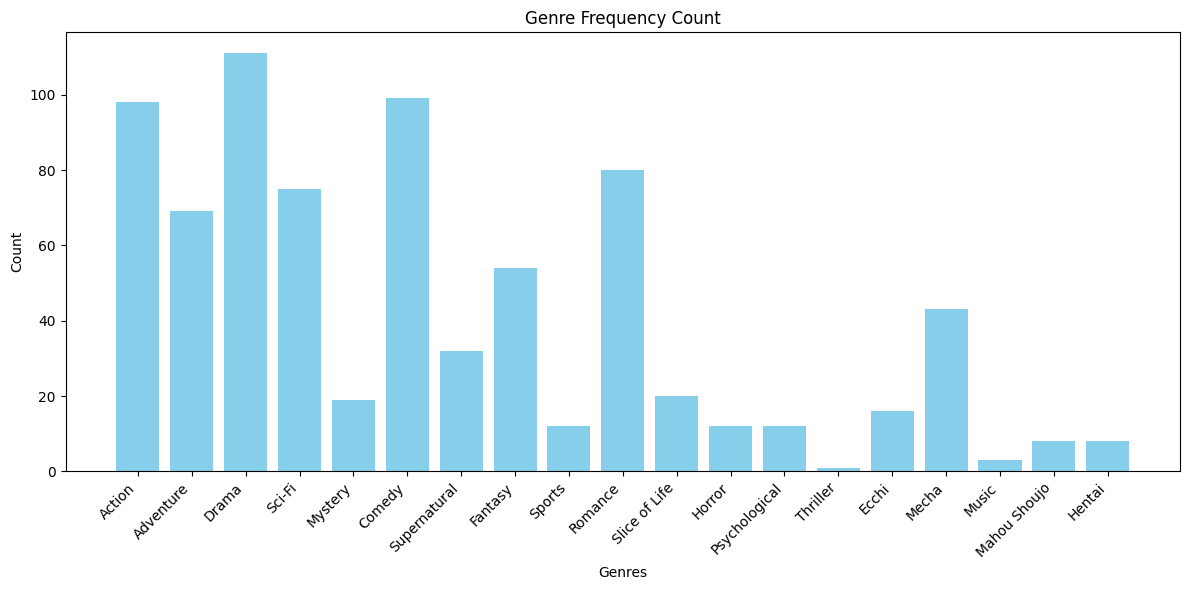

In [8]:
# lets make a function which return disctionary using counter
def count_genres(genre_series):
    all_genres = []
    for text in genre_series:
        # split by comma, strip whitespace, and extend list
        genres = [g.strip() for g in text.split(',')]
        all_genres.extend(genres)
    genre_counts = Counter(all_genres)
    return genre_counts

genre_counts = count_genres(df['genres'])
print(genre_counts)
genre_counts = dict(genre_counts)
print(genre_counts)

plt.figure(figsize=(12,6))
plt.bar(genre_counts.keys(),genre_counts.values(), color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Frequency Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



{'Drama': 111, 'Comedy': 99, 'Action': 98, 'Romance': 80, 'Sci-Fi': 75, 'Adventure': 69, 'Fantasy': 54, 'Mecha': 43, 'Supernatural': 32, 'Slice of Life': 20, 'Mystery': 19, 'Ecchi': 16, 'Sports': 12, 'Horror': 12, 'Psychological': 12, 'Mahou Shoujo': 8, 'Hentai': 8, 'Music': 3, 'Thriller': 1}


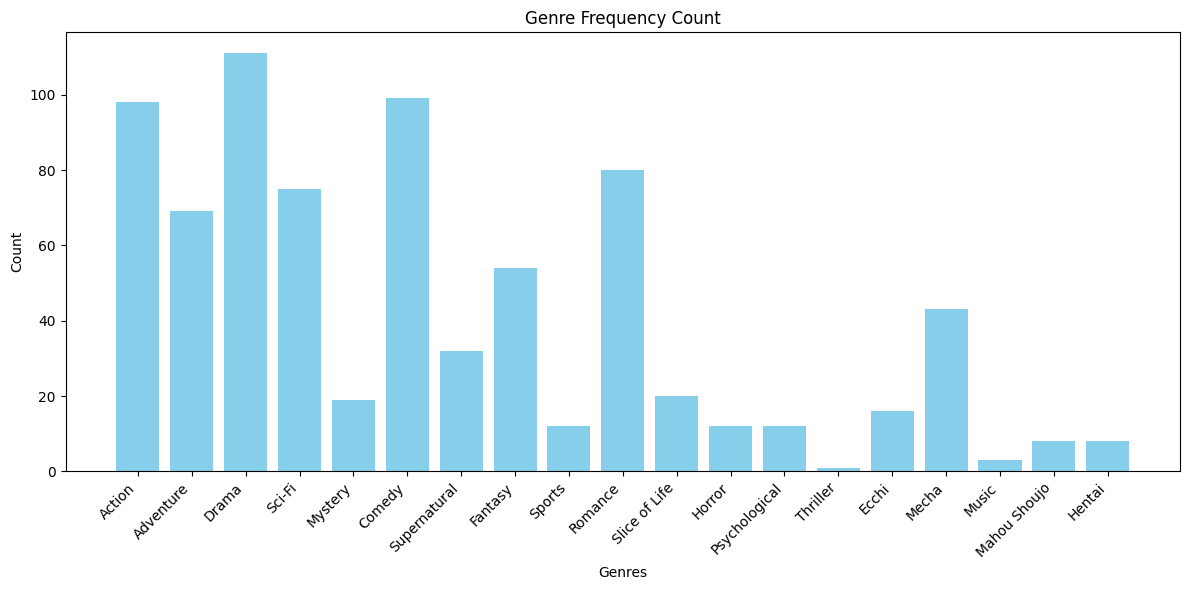

In [9]:
# similar function but without using counter but by using explode

def frequency(text):
    # Split each genre string into list of genres
    lists = text.str.split(',')
    # print(genre_lists)
    # Explode the lists into separate rows
    exploded = lists.explode()
    # print(exploded)
    # Remove extra whitespace
    exploded = exploded.str.strip()
    # Count frequency of each genre
    freq = exploded.value_counts()
    # Convert to dictionary
    return freq.to_dict()

# Usage example:
freq_dict = frequency(df['genres'])
print(freq_dict)
plt.figure(figsize=(12,6))
plt.bar(genre_counts.keys(),genre_counts.values(), color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Genre Frequency Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
# lets undertsand the character
character_frequency = frequency(df["characters"])
print(f"number of character are {len(character_frequency)}")
print(f"character with there values are \n {character_frequency.items()}")

number of character are 3063
character with there values are 
 dict_items([('Narrator', 12), ('Haro', 6), ('Diva', 5), ('Kimiaki Shirai', 4), ('Sarah McDougal', 4), ('Bright Noa', 4), ('Ifurita', 4), ('Masamichi Fujisawa', 4), ('Kenji', 4), ('Ryousuke Takahashi', 4), ('Gon Freecss', 4), ('Hisoka Morow', 4), ('Kouichirou Iketani', 4), ('Mutsumi Otohime', 4), ('Bunta Fujiwara', 4), ('Itsuki Takeuchi', 4), ('Killua Zoldyck', 4), ('Takumi Fujiwara', 4), ('Hiroshi Fumihiro', 4), ('Seta Noriyasu', 4), ('Noblewoman', 4), ('Natsuki Mogi', 4), ('Shinobu Maehara', 4), ('Yuuichi Tachibana', 4), ('Keisuke Takahashi', 4), ('Kenta Nakamura', 4), ('Kentarou Sakata', 4), ('Katsuhiko Jinnai', 4), ('Motoko Aoyama', 4), ('Keitarou Urashima', 4), ('Rune Venus', 4), ('Alielle Relrye', 4), ('Kaolla Suu', 4), ('Mitsune Konno', 4), ('Miz Mishtal', 4), ('Makoto Mizuhara', 4), ('Nanami Jinnai', 4), ('Shayla Shayla', 4), ('Afura Mann', 4), ('Naru Narusegawa', 4), ('Mei Narusegawa', 4), ('Haruka Urashima', 4), ('

In [11]:
# lets check if there is show which is repeated
df["title"].duplicated().sum()

0

In [12]:
df.title.nunique()
# SO NO REPEATED TITLE

200

In [13]:
# LETS DROP THE NULL VALUES PRESENT IN THE CHARACTER
df.dropna(inplace = True)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Assuming df is your DataFrame with 'genres', 'synopsis', 'characters' columns

# Combine text features
df['combined_features'] = df['genres'] + ' ' + df['synopsis'] + ' ' + df['characters']

# Vectorize combined text
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def recommend_anime(title, cosine_sim=cosine_sim, df=df):
    idx = df.index[df['title'] == title][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # top 10 excluding itself
    anime_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[anime_indices]

# Example usage
print(recommend_anime("Arc the Lad"))


91               Chou Henshin Cosprayers
138                Ima, Soko ni Iru Boku
137                 Boukyaku no Senritsu
115                        HUNTER×HUNTER
39                           BLUE GENDER
37                               Avenger
145                    Scrapped Princess
130                            Solty Rei
189                         Project A-Ko
53     Full Metal Panic! The Second Raid
Name: title, dtype: object


In [15]:
print("Recommendation system successfully built and tested! Explore, enjoy, and feel free to customize it further for your personalized anime discovery experience.")


Recommendation system successfully built and tested! Explore, enjoy, and feel free to customize it further for your personalized anime discovery experience.
